In [1]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


# Handle Missing Values

In [68]:
object=[]
for i in df.select_dtypes(include='object'):
    object.append(i)
object
for i in object:
    print(df[i].fillna(df[i].mode()[0],inplace=True))

None
None
None
None
None
None
None
None


C:\Users\DEll\AppData\Local\Temp\ipykernel_18864\3535254753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df[i].fillna(df[i].mode()[0],inplace=True))
C:\Users\DEll\AppData\Local\Temp\ipykernel_18864\3535254753.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  print(df[i].fillna(df[i].mode()[0],inp

In [69]:
float=[]
for i in df.select_dtypes(include='float64'):
    float.append(i)
float
for i in float:
    print(df[i].fillna(df[i].mean(),inplace=True))

None
None
None
None
None


C:\Users\DEll\AppData\Local\Temp\ipykernel_18864\2020394418.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df[i].fillna(df[i].mean(),inplace=True))


In [70]:
int=[]
for i in df.select_dtypes(include='int'):
    int.append(i)
int
for i in int:
    print(df[i].fillna(df[i].mean(),inplace=True))

None
None


C:\Users\DEll\AppData\Local\Temp\ipykernel_18864\3556962303.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df[i].fillna(df[i].mean(),inplace=True))


In [71]:
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
object

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Categorical to Numerical

In [72]:
le=LabelEncoder()
for i in object:
    df[i]=le.fit_transform(df[[i]])
df.head()

C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


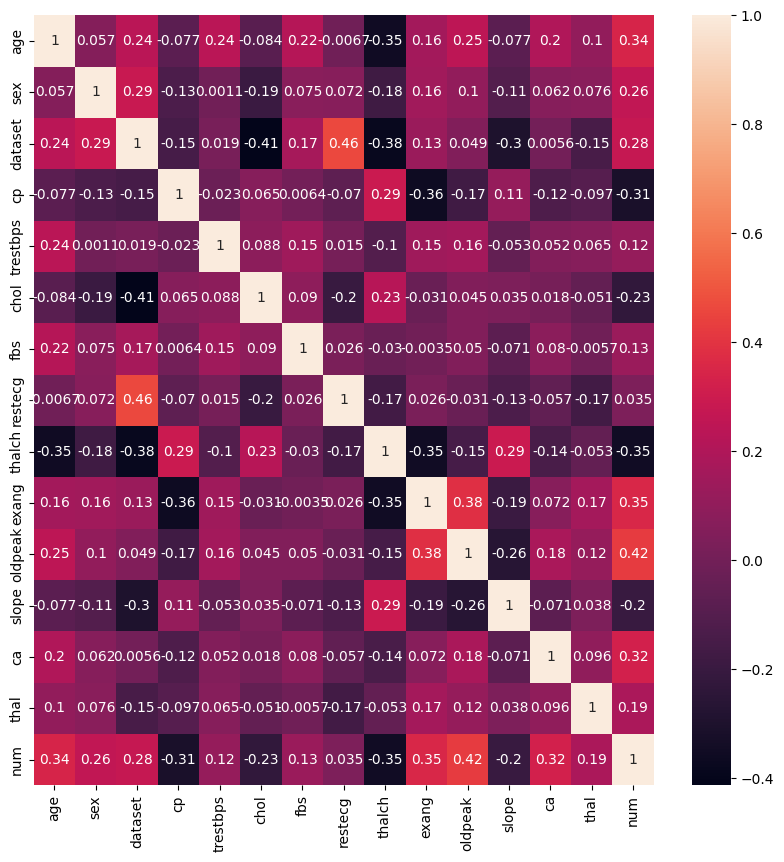

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.describe()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,1.238043,0.782609,132.132404,199.130337,0.150000,0.990217,137.545665,0.366304,0.878788,1.152174,0.676375,1.158696,0.995652
std,9.424685,0.408148,1.130673,0.956350,18.443895,108.957634,0.357266,0.631863,25.138494,0.482056,1.053774,0.516007,0.541667,0.483493,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,0.000000,120.000000,177.750000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.676375,1.000000,0.000000
50%,54.000000,1.000000,1.000000,0.000000,130.000000,221.000000,0.000000,1.000000,138.000000,0.000000,0.800000,1.000000,0.676375,1.000000,1.000000
75%,60.000000,1.000000,2.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,0.676375,1.000000,2.000000
max,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,4.000000


# Scaling

In [13]:
ss=StandardScaler()
ss.fit(df[['chol']])
df['chol']=pd.DataFrame(ss.transform(df[['chol']]))
ss.fit(df[['thalch']])
df['thalch']=pd.DataFrame(ss.transform(df[['thalch']]))
ss.fit(df[['trestbps']])
df['trestbps']=pd.DataFrame(ss.transform(df[['trestbps']]))
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,0.698041,0.311021,1,0,0.495698,0,2.3,0,0.0,0,0
1,67,1,0,0,1.511761,0.797713,0,0,-1.175955,1,1.5,1,3.0,1,2
2,67,1,0,0,-0.658158,0.274289,0,0,-0.340128,1,2.6,1,2.0,2,1
3,37,1,0,2,-0.115679,0.467130,0,1,1.968345,0,3.5,0,0.0,1,0
4,41,0,0,1,-0.115679,0.044717,0,0,1.371326,0,1.4,2,0.0,1,0


# Outliers

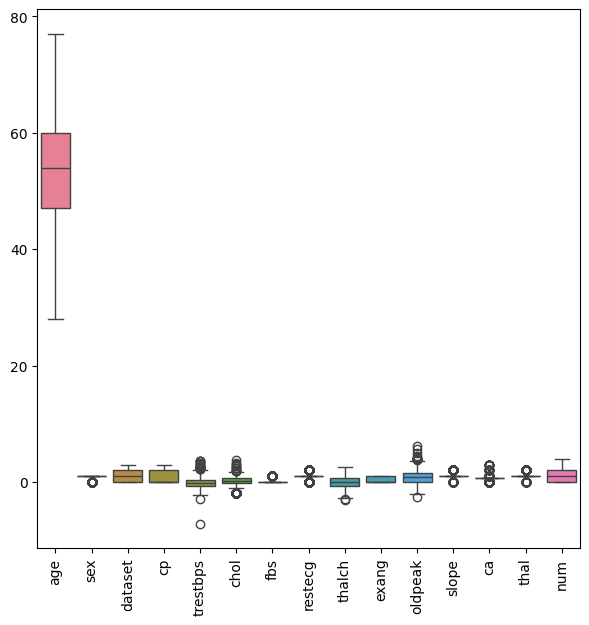

In [14]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

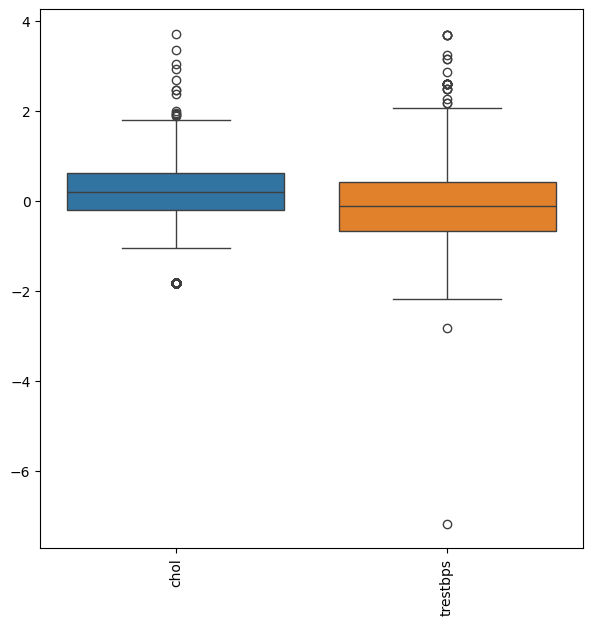

In [15]:
plt.figure(figsize=(7,7))
columns=['chol','trestbps']
sns.boxplot(data=df[columns])
plt.xticks(rotation=90)
plt.show()

In [16]:
q1=df['chol'].quantile(0.25)
q3=df['chol'].quantile(0.75)

In [17]:
iqr=q3-q1

In [18]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range,max_range

(-1.4256897721672668, 1.8525952661491392)

In [19]:
new_df=df[(df['chol']<min_range) | (df['chol']>max_range)]

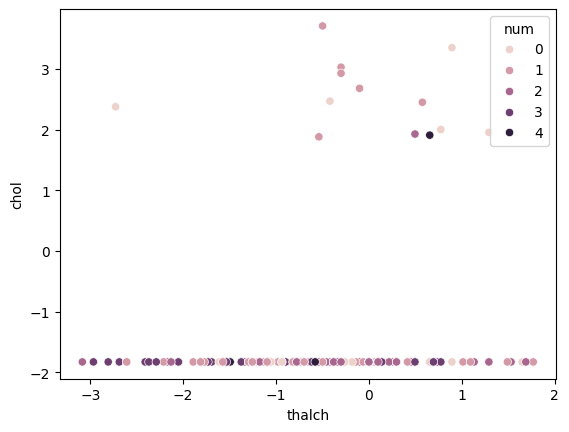

In [20]:
sns.scatterplot(x='thalch',y='chol',hue='num',data=new_df)
plt.show()

# Sperate Data

In [21]:
x=df.iloc[:,:-1]
y=df['num']

# Imbalance data

In [22]:
ros=RandomOverSampler()
rox,roy=ros.fit_resample(x,y)

# Train Test Split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

# Logistic Regression

In [24]:
cv=cross_val_score(LogisticRegression(),x,y,cv=KFold(n_splits=5))
cv.sort()
cv*100

C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

array([29.89130435, 35.32608696, 61.41304348, 69.02173913, 74.45652174])

In [25]:
dict={
    'penalty':['l1', 'l2', 'elasticnet', None],
    'dual':[bool,False],
    'class_weight':['dict','balanced'],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga','lbfgs']
}

In [26]:
gd=GridSearchCV(LogisticRegression(),param_grid=dict)
gd.fit(x_train,y_train)

C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: Convergen

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'dual': [<class 'bool'>, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga',
                                    'lbfgs']})

In [27]:
gd.best_score_

0.5435466078323221

In [28]:
gd.best_params_

{'class_weight': 'balanced',
 'dual': False,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [24]:
lr=LogisticRegression(class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [25]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100,

(57.74456521739131, 58.69565217391305)

# Confusion Matrix

In [31]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[80,  9,  3,  2,  0],
       [12, 18,  3,  5,  1],
       [ 2,  7,  6,  6,  4],
       [ 1,  4,  4,  2, 10],
       [ 0,  0,  1,  2,  2]], dtype=int64)

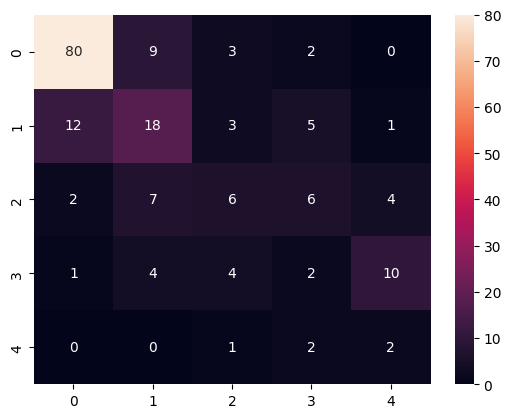

In [32]:
sns.heatmap(cf,annot=True)
plt.show()

In [34]:
f1_score(y_test,lr.predict(x_test),average='weighted')

0.5873530444468659

In [35]:
recall_score(y_test,lr.predict(x_test),average='weighted')

0.5869565217391305

In [36]:
precision_score(y_test,lr.predict(x_test),average='weighted')

0.595184412437744

In [37]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

# Decision Tree


In [38]:
dict1={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(1,10)],
    'min_samples_split': [i for i in range(2,10)],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [231]:
cv=cross_val_score(DecisionTreeClassifier(),x,y,cv=KFold(n_splits=5))
cv.sort()
cv*100

array([31.52173913, 32.60869565, 41.30434783, 51.08695652, 54.34782609])

In [232]:
gs=GridSearchCV(DecisionTreeClassifier(),param_grid=dict1)
gs.fit(x_train,y_train)

C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [233]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'splitter': 'best'}

In [30]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=7,splitter='best',max_features='sqrt',min_samples_split= 4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_split=4)

In [31]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100,

(70.65217391304348, 56.52173913043478)

In [236]:
cf1=confusion_matrix(y_test,dt.predict(x_test))
cf1

array([[69, 13,  8,  8,  2],
       [20, 32, 10,  9,  9],
       [ 4, 15, 32,  8,  4],
       [ 5, 23,  7, 41, 13],
       [ 0,  0,  2,  0, 77]], dtype=int64)

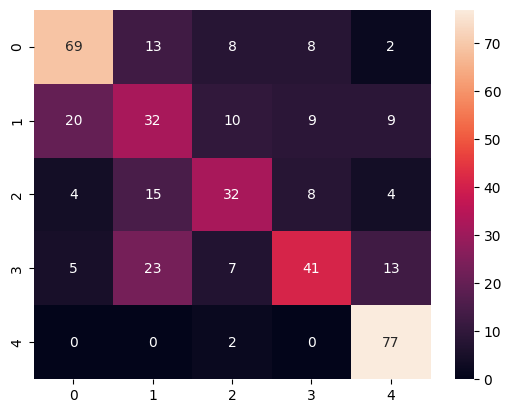

In [237]:
sns.heatmap(cf1,annot=True)
plt.show()

In [74]:
f1_score(y_test,dt.predict(x_test),average='weighted')

0.4999138192750038

In [239]:
recall_score(y_test,lr.predict(x_test),average='weighted')

0.45985401459854014

In [240]:
precision_score(y_test,lr.predict(x_test),average='weighted')

0.4401147821193543

In [241]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50)
bc.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [242]:
bc.score(x_train,y_train)*100,bc.score(x_test,y_test)*100

(99.93917274939173, 87.34793187347933)

# SVM Classifier

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [245]:
cv=cross_val_score(SVC(),x,y,cv=KFold(n_splits=5))
cv.sort()
cv*100

array([ 7.60869565, 24.45652174, 55.43478261, 65.76086957, 68.47826087])

In [39]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [40]:
svc.score(x_train,y_train)*100,svc.score(x_test,y_test)*100,

(45.65217391304348, 40.76086956521739)

In [248]:
cf2=confusion_matrix(y_test,svc.predict(x_test))
cf2

array([[75,  0,  0,  0,  0],
       [54,  0,  0,  0,  0],
       [25,  0,  0,  0,  0],
       [26,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0]], dtype=int64)

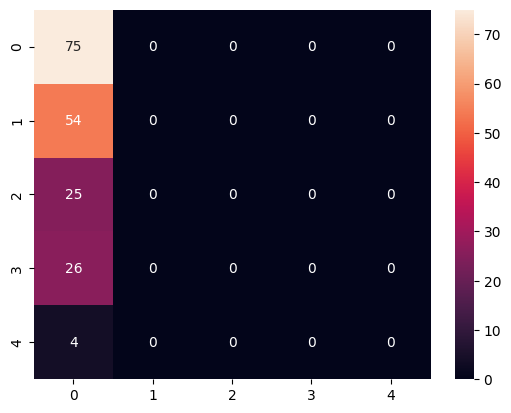

In [249]:
sns.heatmap(cf2,annot=True)
plt.show()

In [250]:
f1_score(y_test,svc.predict(x_test),average='weighted')

0.23606681215376865

In [251]:
recall_score(y_test,svc.predict(x_test),average='weighted')

0.4076086956521739

In [252]:
precision_score(y_test,svc.predict(x_test),average='weighted')

C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.16614484877126653

# random forest

In [34]:
cvs=cross_val_score(RandomForestClassifier(),x,y,cv=KFold(n_splits=5))
cvs

array([0.61956522, 0.60869565, 0.66847826, 0.33152174, 0.33152174])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(rox,roy,test_size=0.2,random_state=42)

In [25]:
dict3={
    'n_estimators': [i for i in range(1,10)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [i for i in range(1,10)],
    'min_samples_split':  [i for i in range(1,10)],
    'max_features': ['sqrt', 'log2'] 
}

In [26]:
gd3=GridSearchCV(RandomForestClassifier(),param_grid=dict3)
gd3.fit(x_train,y_train)

KeyboardInterrupt: 

In [46]:
gd3.best_params_


NameError: name 'gd3' is not defined

In [42]:
rfc=RandomForestClassifier(n_estimators=300,max_depth=8,max_features=0.4,criterion='entropy',min_samples_split=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=0.4,
                       min_samples_split=5, n_estimators=300)

In [43]:
rfc.score(x_train,y_train)*100,rfc.score(x_test,y_test)*100,

(95.07299270072993, 87.34793187347933)

In [75]:
bg1=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50)
bg1.fit(x_train,y_train)

KeyboardInterrupt: 

In [45]:
bg1.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

(99.87834549878345, 90.02433090024331)

In [46]:
cf3=confusion_matrix(y_test,rfc.predict(x_test))
cf3

array([[72,  6,  6,  1,  0],
       [16, 49, 10,  5,  1],
       [ 1,  0, 67,  4,  0],
       [ 0,  0,  0, 82,  2],
       [ 0,  0,  0,  0, 89]], dtype=int64)

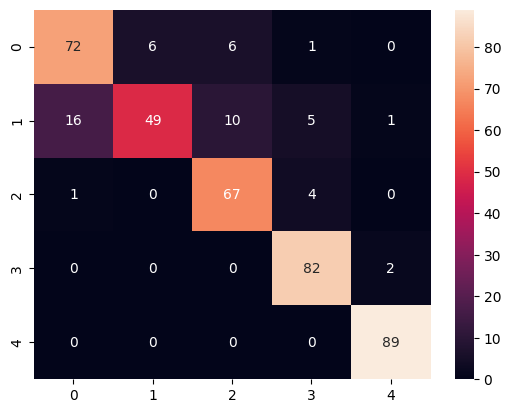

In [47]:
sns.heatmap(cf3,annot=True)
plt.show()

In [265]:
f1_score(y_test,rfc.predict(x_test),average='weighted')

0.8771808923799693

In [266]:
recall_score(y_test,rfc.predict(x_test),average='weighted')

0.8807785888077859

In [267]:
precision_score(y_test,rfc.predict(x_test),average='weighted')

0.8768879773716657

In [48]:
joblib.dump(bg1, 'random_forest_model.joblib')

['random_forest_model.joblib']

AUC-ROC: 0.9721905499929056


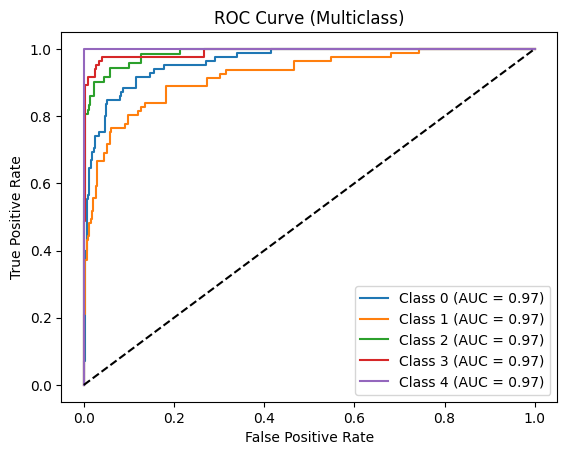

In [ ]:
# Get the probabilities for each class
y_prob = rfc.predict_proba(x_test)

# Compute AUC-ROC score for multiclass classification (One-vs-Rest)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # or use multi_class='ovo'
print(f'AUC-ROC: {auc}')

for i in range(len(rfc.classes_)):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()


In [82]:
gini = 2 * auc - 1
print(f'Gini Coefficient: {gini}')

Gini Coefficient: 0.9443810999858111


# Gradient Boosting

In [85]:
x_train,x_test,y_train,y_test=train_test_split(rox,roy,test_size=0.2,random_state=42)

In [86]:
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [87]:
gbc.score(x_train,y_train)*100,gbc.score(x_test,y_test)*100

(91.54501216545012, 84.42822384428223)

In [88]:
bc1=BaggingClassifier(estimator=GradientBoostingClassifier(),n_estimators=100)
bc1.fit(x_train,y_train)

BaggingClassifier(estimator=GradientBoostingClassifier(), n_estimators=100)

In [273]:
bc1.score(x_train,y_train)*100,bc1.score(x_test,y_test)*100

(92.2749391727494, 83.94160583941606)

In [274]:
cf4=confusion_matrix(y_test,gbc.predict(x_test))
cf4

array([[72,  7,  4,  2,  0],
       [16, 50,  8,  7,  0],
       [ 4,  7, 58,  2,  1],
       [ 3,  3,  2, 75,  1],
       [ 0,  0,  0,  0, 89]], dtype=int64)

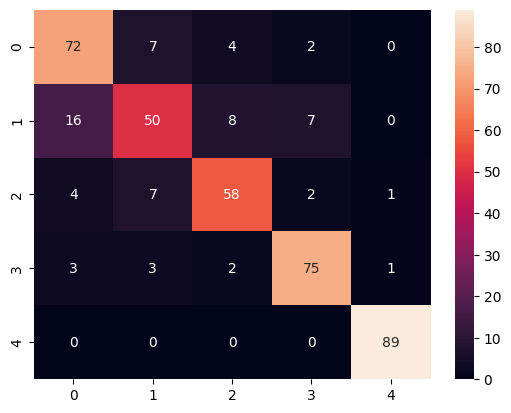

In [275]:
sns.heatmap(cf4,annot=True)
plt.show()

In [276]:
f1_score(y_test,gbc.predict(x_test),average='weighted')

0.8342055666658501

In [277]:
recall_score(y_test,gbc.predict(x_test),average='weighted')

0.8369829683698297

In [278]:
precision_score(y_test,gbc.predict(x_test),average='weighted')

0.8349600579636332

In [89]:
joblib.dump(bc1, 'Gradient_bosting_model.joblib')

['Gradient_bosting_model.joblib']

# Max Voting

In [49]:
list=[('LR',LogisticRegression()),('DT',DecisionTreeClassifier()),('SVC',SVC()),('RF',RandomForestClassifier()),('GB',GradientBoostingClassifier())]

In [50]:
vc=VotingClassifier(list,weights=[20,20,20,20,20])
vc.fit(x_train,y_train)

C:\Users\DEll\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()), ('SVC', SVC()),
                             ('RF', RandomForestClassifier()),
                             ('GB', GradientBoostingClassifier())],
                 weights=[20, 20, 20, 20, 20])

In [51]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.38442822384428, 89.29440389294405)